In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bokeh
import os
from collections import defaultdict

# Ambiente - Calidad del Aire

In [2]:
path = "/content/gdrive/My Drive/Datos/Resources/Bogota/medicionesAire"
path = "data/medicionesAire"

In [3]:
def unirMedicionesAnualesKennedy(rutaExcels):
    """Une todos los archivos anuales de las mediciones de la estación kenenedy"""
    archivos = list()
    for root, dirs, excels in os.walk(rutaExcels):
        for excel in excels:
            datos = pd.read_excel(os.path.join(root, excel), decimal=',')
            a, b  = list(datos.iloc[1:3,30:45].values)
            nombre_variables = list(zip(a,b))
            nombre_variables = list(map(lambda x: " ".join(x), nombre_variables))
            datos_variables_k = datos.iloc[3:369,30:45]
            datos_variables_k.columns = nombre_variables
            datos_fecha = datos.iloc[3:369,0].values
            datos_variables_k.insert(0, 'Fecha',datos_fecha)
            archivos.append(datos_variables_k)

    return pd.concat(archivos)        
            
            
datos_kennedy = unirMedicionesAnualesKennedy(path)
datos_kennedy = datos_kennedy.set_index('Fecha')

In [4]:
# para interpolar los datos, recomendado asegurarse de que sean las columnas de tipo numerico
for columna in datos_kennedy.keys():
    datos_kennedy[columna] = datos_kennedy[columna].apply(pd.to_numeric).interpolate(method='time', limit=1000, limit_direction='both')

In [5]:
datos_kennedy.head()

,NO2 ppb,PM10 µg/m3,SO2 ppb,Humedad %,O3 API None,NO ppb,Vel Viento m/s,Rad Solar W/M2,CO ppm,NOX ppb,Presion Baro mmHg,Dir Viento Grados,OZONO ppb,Precipitacion mm,PM2.5 µg/m3
Fecha,,,,,,,,,,,,,,,
2008-12-31,30.5,129.1,4.9,76.000000,NaN,48.4,2.30,225.0,0.3,81.3,563.0,296.000000,NaN,0.00,49.200000
2009-01-01,30.5,120.6,4.9,74.333333,NaN,48.4,2.25,225.0,0.3,81.3,563.0,253.833333,NaN,0.45,45.066667
2009-01-02,30.5,112.1,4.9,72.666667,NaN,48.4,2.20,225.0,0.3,81.3,563.0,211.666667,NaN,0.90,40.933333
2009-01-03,30.5,103.6,4.9,71.000000,NaN,48.4,2.15,225.0,0.3,81.3,563.0,169.500000,NaN,1.35,36.800000
2009-01-04,30.5,95.1,4.9,69.333333,NaN,48.4,2.10,225.0,0.3,81.3,563.0,127.333333,NaN,1.80,32.666667


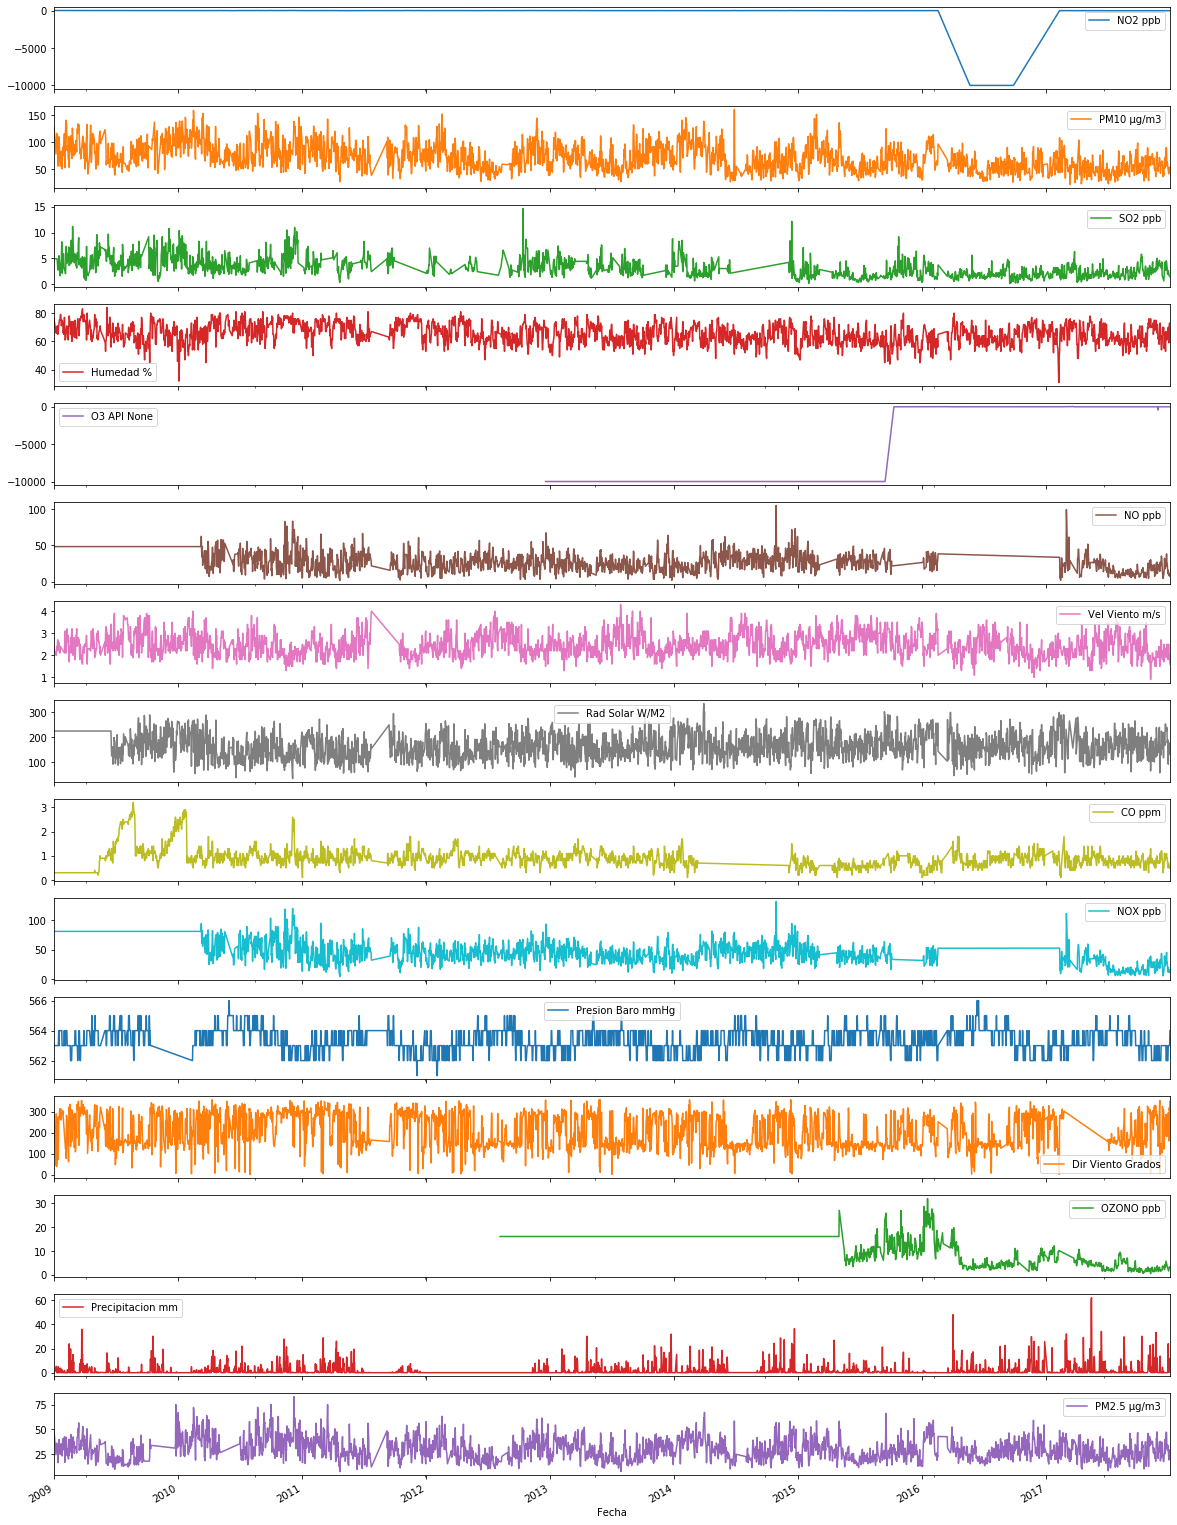

In [6]:
datos_kennedy.plot(subplots=True,figsize=(20,30));

# Correlación

In [7]:
corr = datos_kennedy.corr()

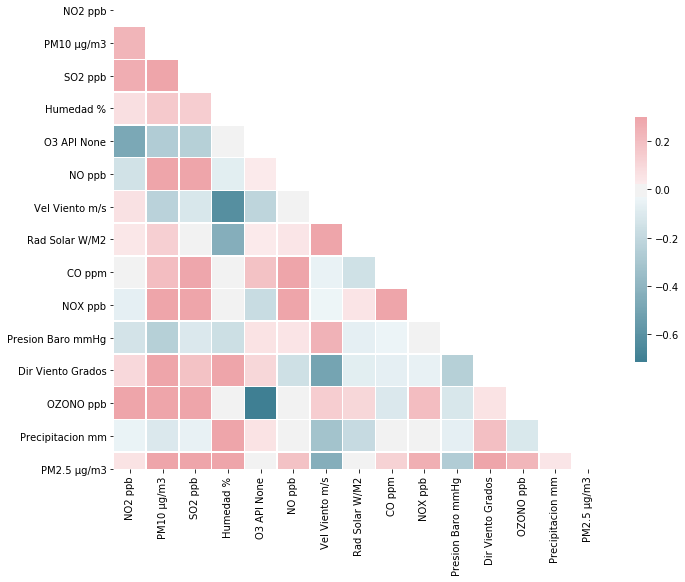

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Salud - Muertes por enfermedades respiratorias

In [9]:
path = "/content/gdrive/My Drive/Datos/Resources/Bogota/medicionesMuertes/muertesAnuales.xlsx"
path = "data/medicionesMuertes/muertesAnuales.xlsx"

In [10]:
muertesAnuales = pd.read_excel(path)
muertesAnuales = muertesAnuales.set_index('Fecha')

In [11]:
muertesAnuales

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Fecha,,,,,,,,,,,,
2009,18,16,20,31,30,21,25,24,22,21,21,16
2010,25,21,18,25,25,28,36,35,20,30,32,28
2011,23,11,26,29,30,34,27,22,20,19,16,31
2012,26,19,22,31,45,23,27,24,15,30,29,19
2013,28,17,17,26,35,28,21,25,21,22,27,25
2014,25,20,29,31,23,22,30,23,32,24,29,33
2015,35,24,24,40,28,30,32,28,30,23,25,11
2016,26,17,33,32,40,42,30,40,22,41,20,40


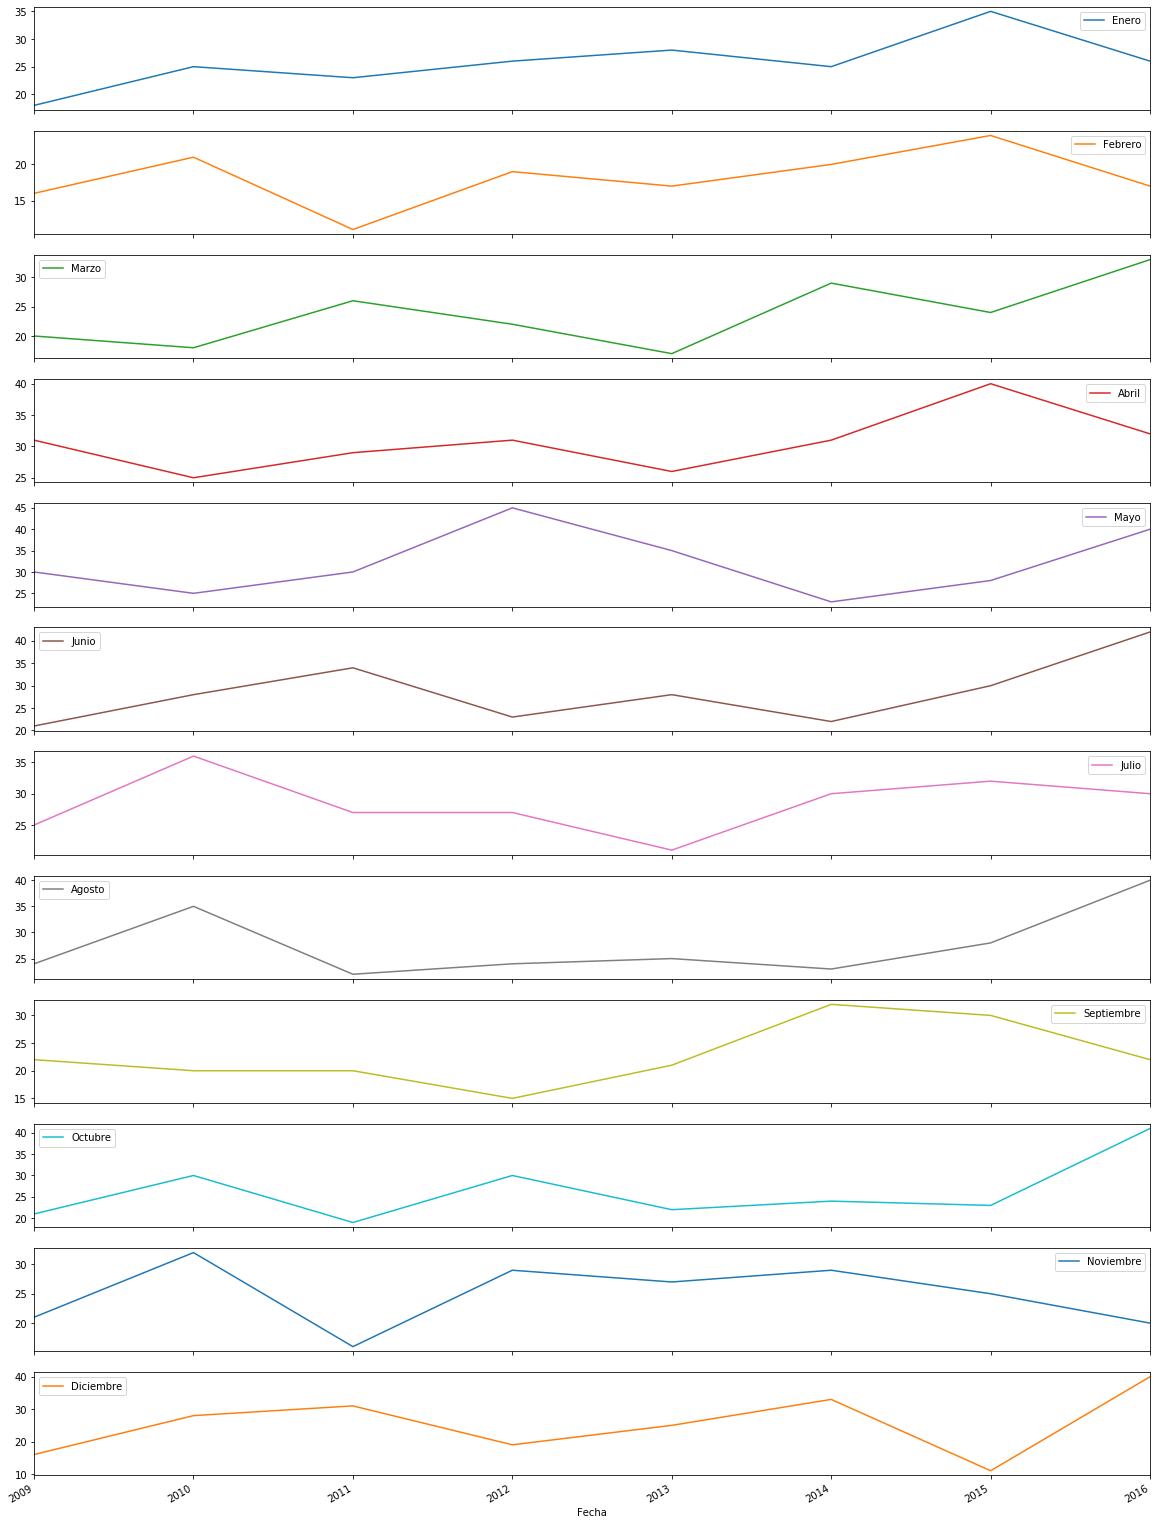

In [12]:
muertesAnuales.plot(subplots=True, figsize=(20,30));

In [13]:
def crearSerie(datos, col):
    serie = list()
    for fila in range(datos.shape[0]):
        serie = serie + list(datos.iloc[fila,:].values)
    return pd.DataFrame(serie, columns=[col], index=list(datos.columns)*datos.shape[0])

muertesAnualesSerie = crearSerie(muertesAnuales, 'Muerte')

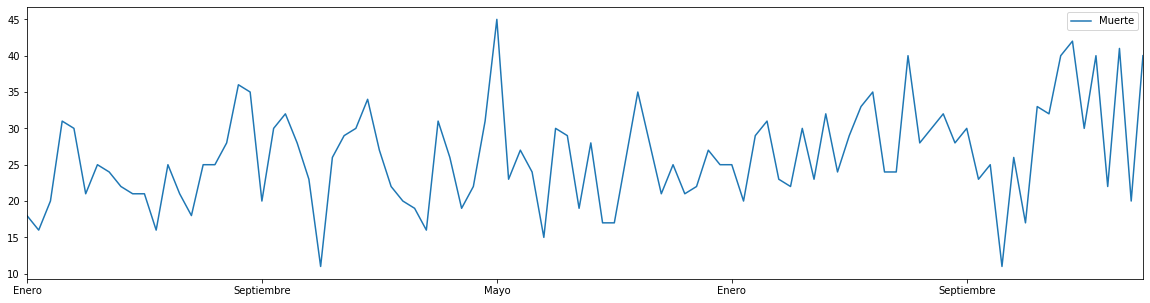

In [14]:
muertesAnualesSerie.plot(figsize=(20,5));

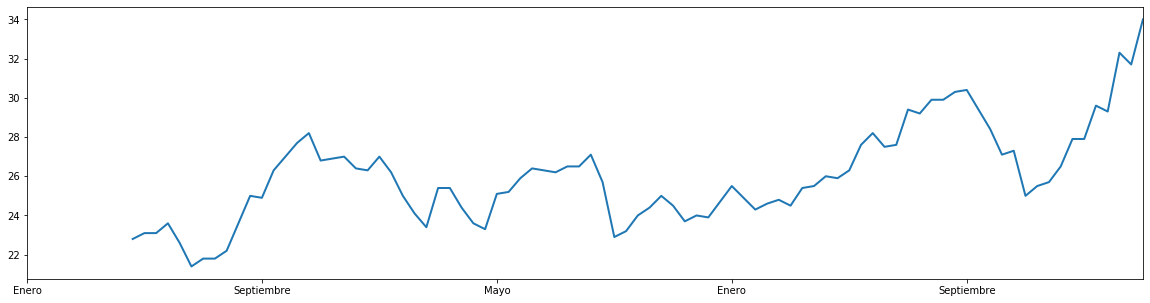

In [15]:
muertesAnualesSerie.Muerte.rolling(10).mean().plot(figsize=(20,5), linewidth=2, fontsize=10);

# Relación Muertes y mediciones 

In [16]:
nuevoEscalaAire = defaultdict(list)
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017]
for k in datos_kennedy.keys():
  data10PM = datos_kennedy[k]
  for y in years:
    for m in range(1,13):
      a = data10PM[data10PM.index.year==y]
      nuevoEscalaAire[k].append(a[a.index.month==m].mean())
nuevoEscalaAire = pd.DataFrame(nuevoEscalaAire)

In [17]:
def plotRelacion(datosMedicion, muertes, label):
  meses = range(1,97)
  muertesMensual = muertes

  fig, ax1 = plt.subplots(figsize=(17,5))
  ax1.plot(meses, datosMedicion, label=label, color='blue')
  ax1.set_xlabel('Meses')
  ax1.set_ylabel('Emisión mensual (promedio)', color='blue')
  ax1.tick_params(axis='y', labelcolor='blue')
  plt.legend(loc='upper left')
  ax2 = ax1.twinx() 
  ax2.plot(meses, muertes, label='Muertes', color = 'red')
  ax2.set_ylabel('Cantidad de muertes mensual', color='red')
  ax2.tick_params(axis='y', labelcolor='red')

  fig.tight_layout()
  plt.legend(loc='upper right')
  plt.title('2009 - 2016')
  plt.show()

In [18]:
nuevoEscalaAire = nuevoEscalaAire.iloc[:-12,:]

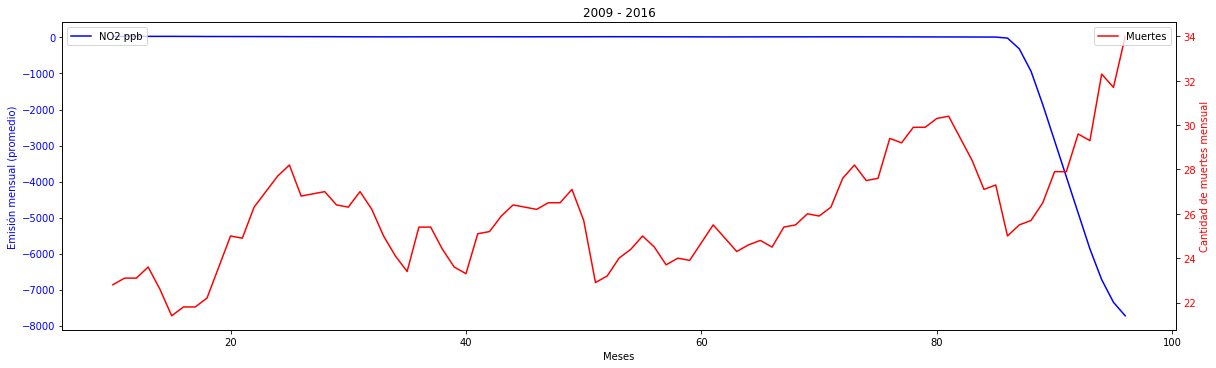

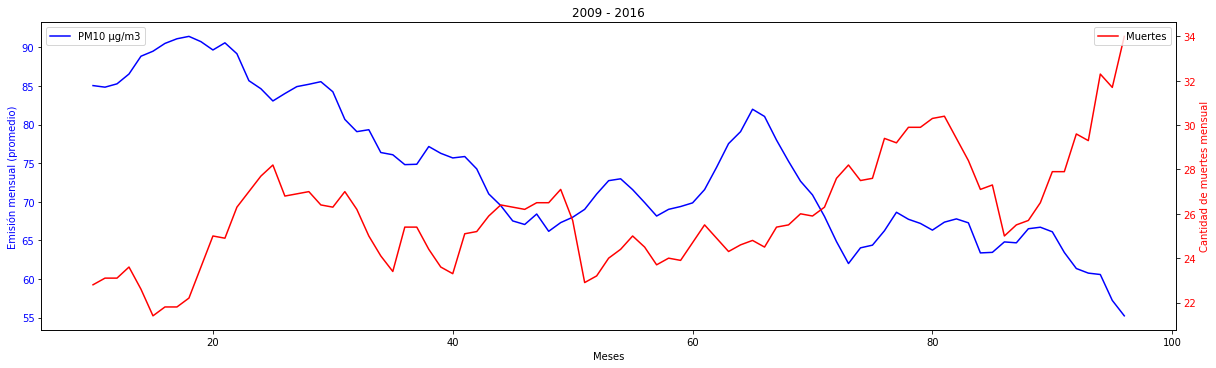

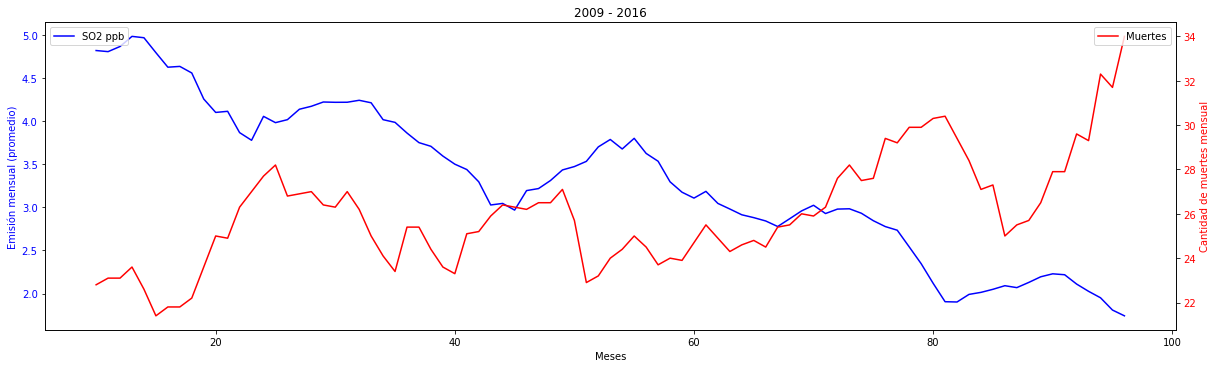

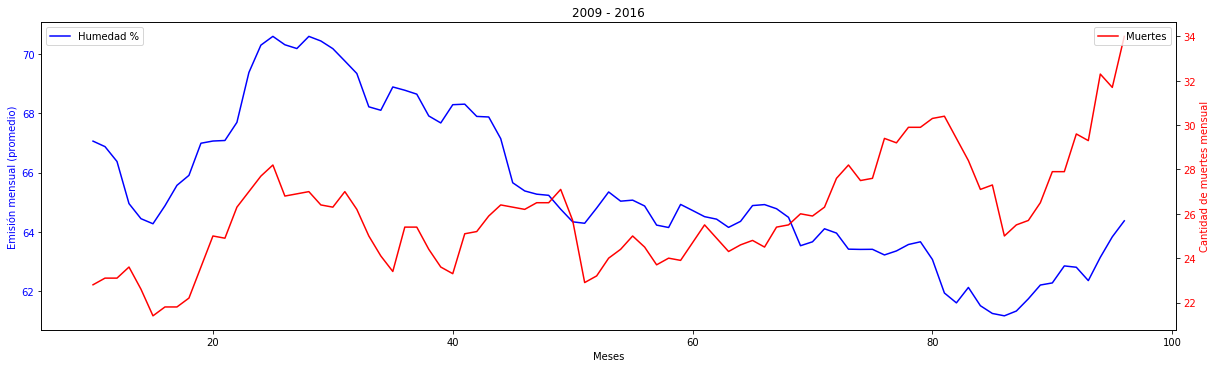

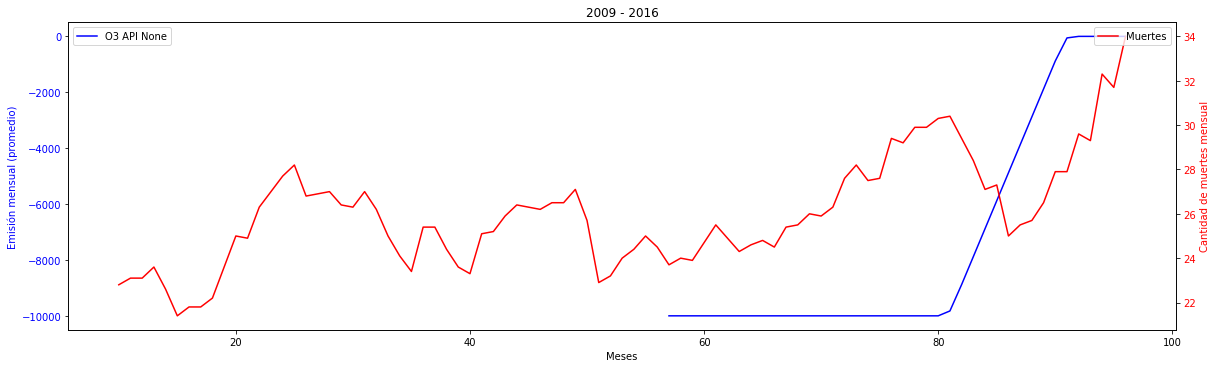

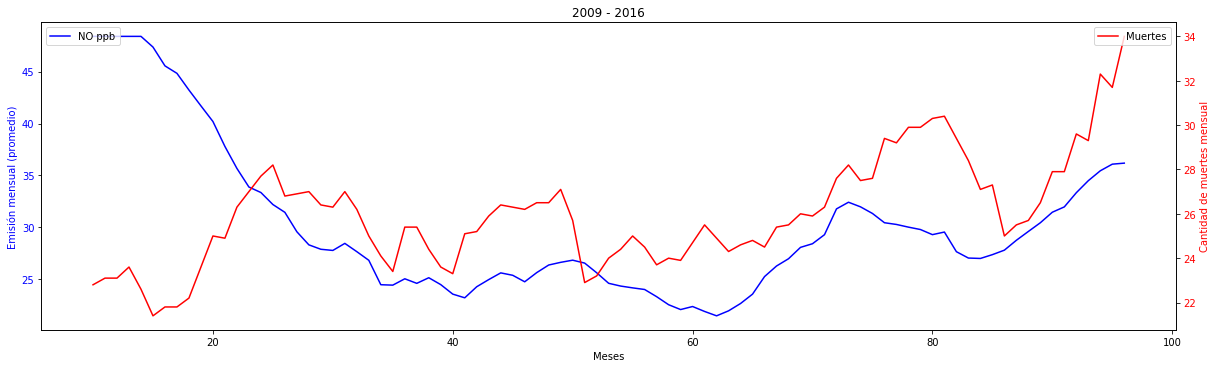

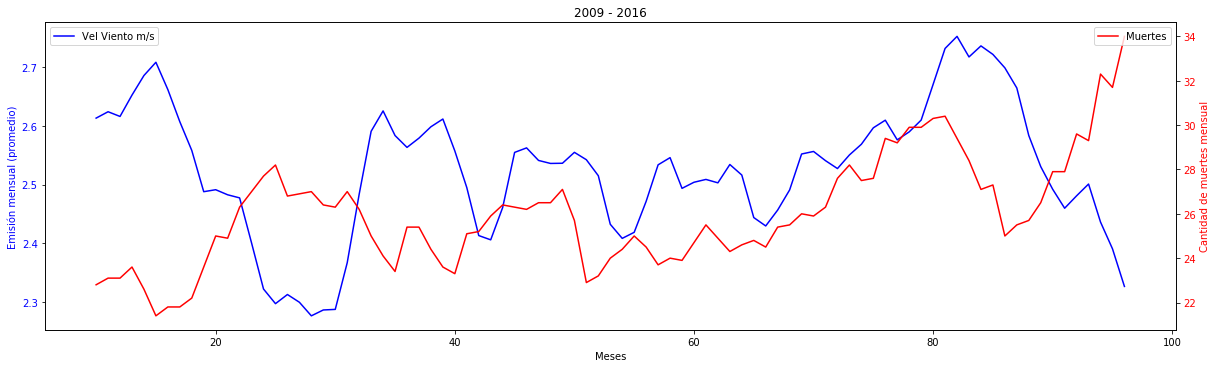

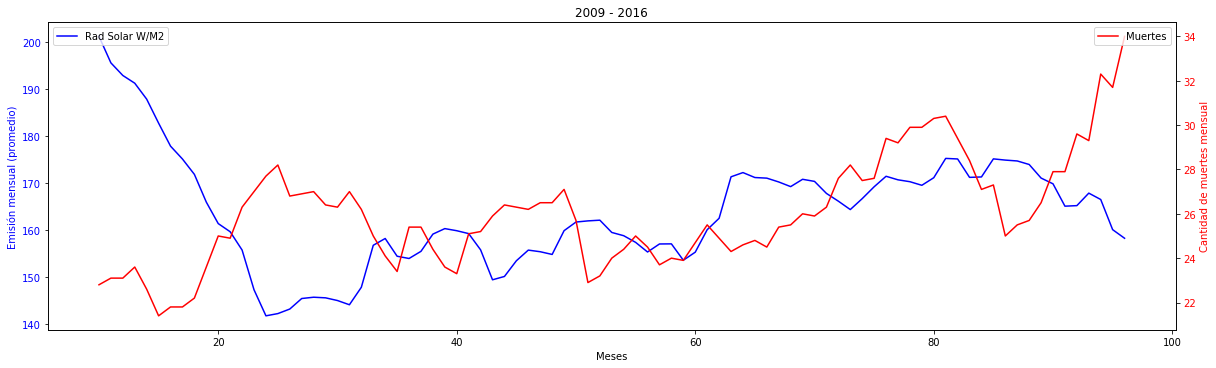

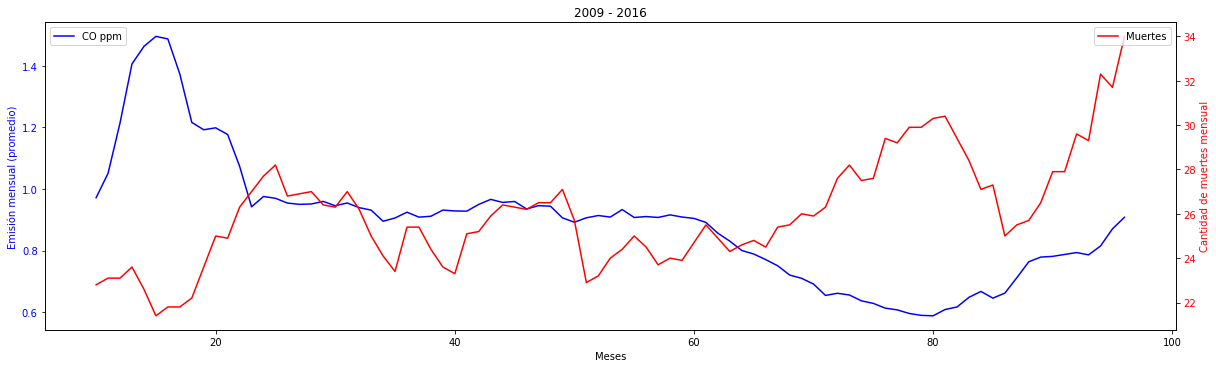

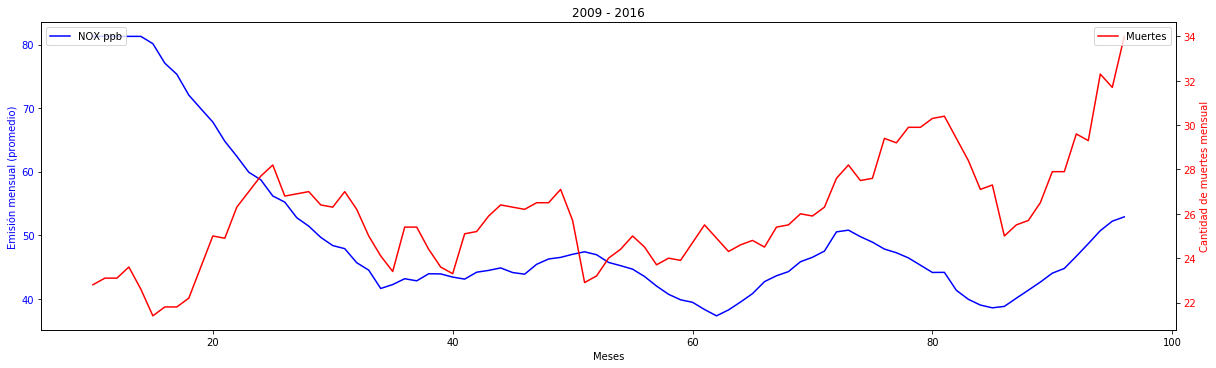

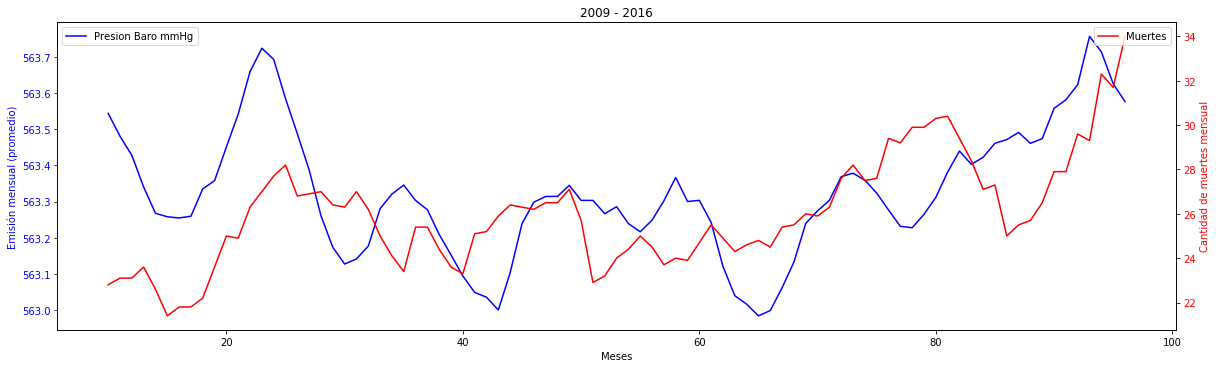

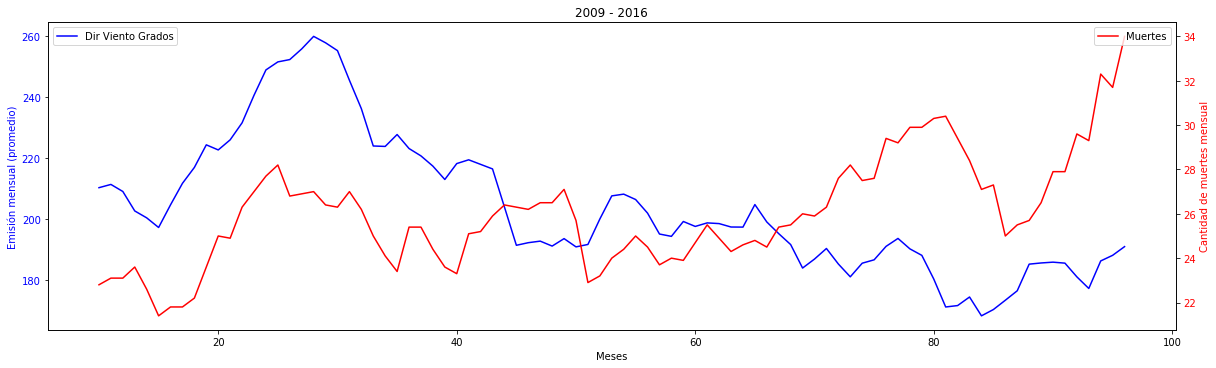

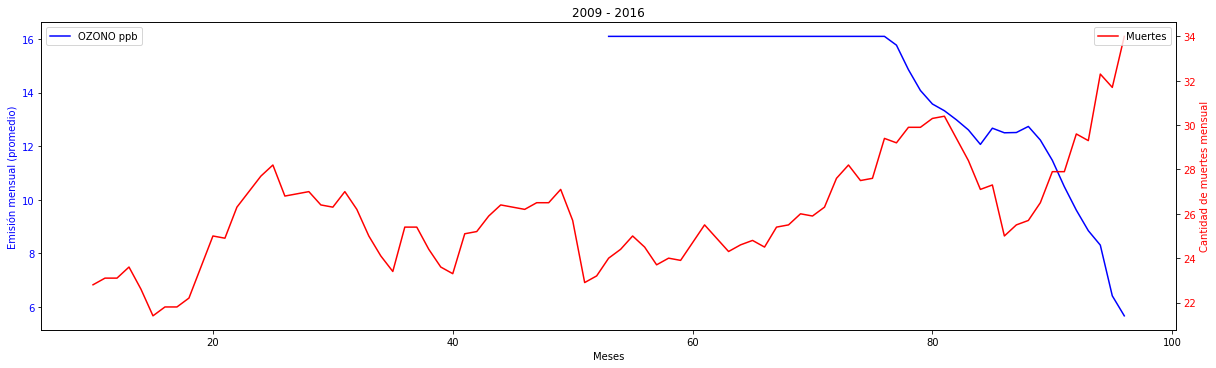

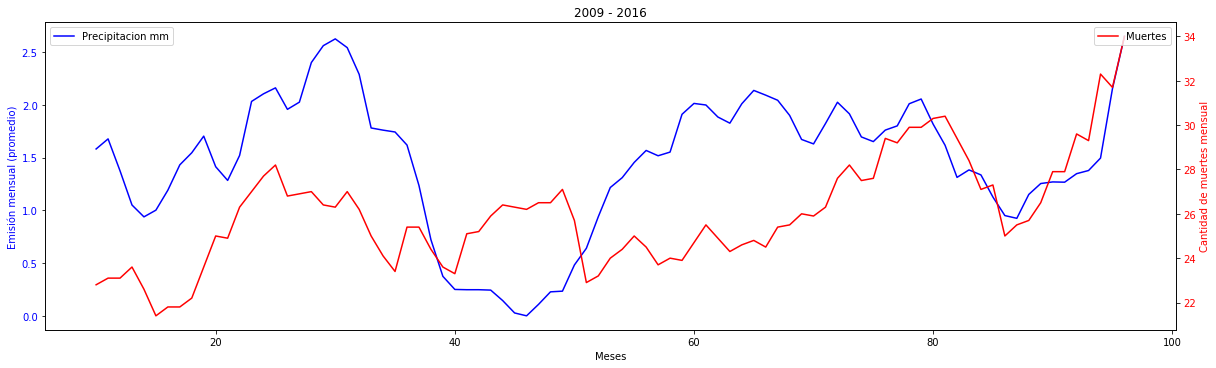

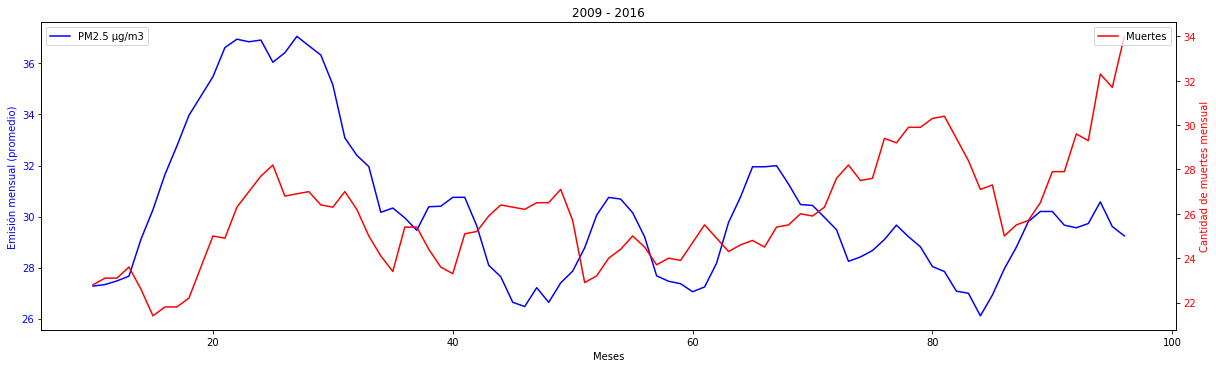

In [19]:
for k in nuevoEscalaAire.keys():
  datoskMensual = nuevoEscalaAire[k].rolling(10).mean().values
  muertesMensual = muertesAnualesSerie.Muerte.rolling(10).mean().values
  plotRelacion(datoskMensual, muertesMensual, label=k)

In [20]:
nuevoEscalaAire['Muertes'] = muertesAnualesSerie.Muerte.values

In [21]:
corr = nuevoEscalaAire.corr()

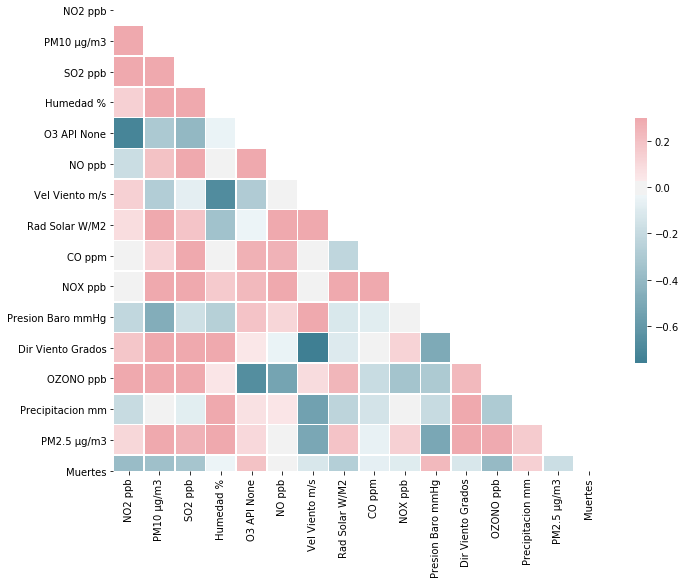

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Recolección de Residuos

In [23]:
path = "/content/gdrive/My Drive/Datos/Resources/Bogota/medicionesResiduos/medicionesResiduos.xlsx"
path = "data/medicionesResiduos/medicionesResiduos.xlsx"

In [24]:
medicionesResiduos = pd.read_excel(path, decimal=',', thousand='.')
medicionesResiduos = medicionesResiduos.set_index('Fecha')

In [25]:
medicionesResiduos

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Fecha,,,,,,,,,,,,
2009,25478.26,23090.210,25949.270,25216.700,24740.820,24924.720,25053.99,24848.91,24518.630,25726.300,25315.600,27573.72
2010,24047.76,22977.610,24880.420,24827.410,27144.570,27577.070,28123.94,27728.10,26922.010,27283.930,29516.670,30223.40
2011,28288.17,26430.304,30515.831,28481.657,30328.942,28914.403,28293.14,29528.42,28402.991,29180.407,30082.129,30983.92
2012,28493.59,27417.800,30109.170,27365.370,30393.720,28862.180,29182.94,28465.34,27562.010,29909.840,29439.670,29593.43
2013,27486.64,25234.140,25584.440,26563.710,27058.260,25730.040,27804.38,27794.55,25596.790,28246.960,28031.340,30536.96
2014,27494.21,26360.820,29782.080,27988.580,29422.340,26284.560,29395.27,27537.57,28200.880,27430.390,28854.700,30274.46
2015,28155.54,26304.500,27789.480,25641.700,27013.460,27760.850,28360.55,28012.80,26878.360,27395.190,27086.970,28768.45
2016,24849.30,25234.430,27479.290,27193.900,27991.150,26922.850,27489.56,28010.63,27323.450,27520.430,28962.650,31032.56
2017,27801.67,26024.290,28584.480,27616.360,30518.700,28422.810,28830.35,28554.34,26759.870,28015.410,28728.760,30430.37


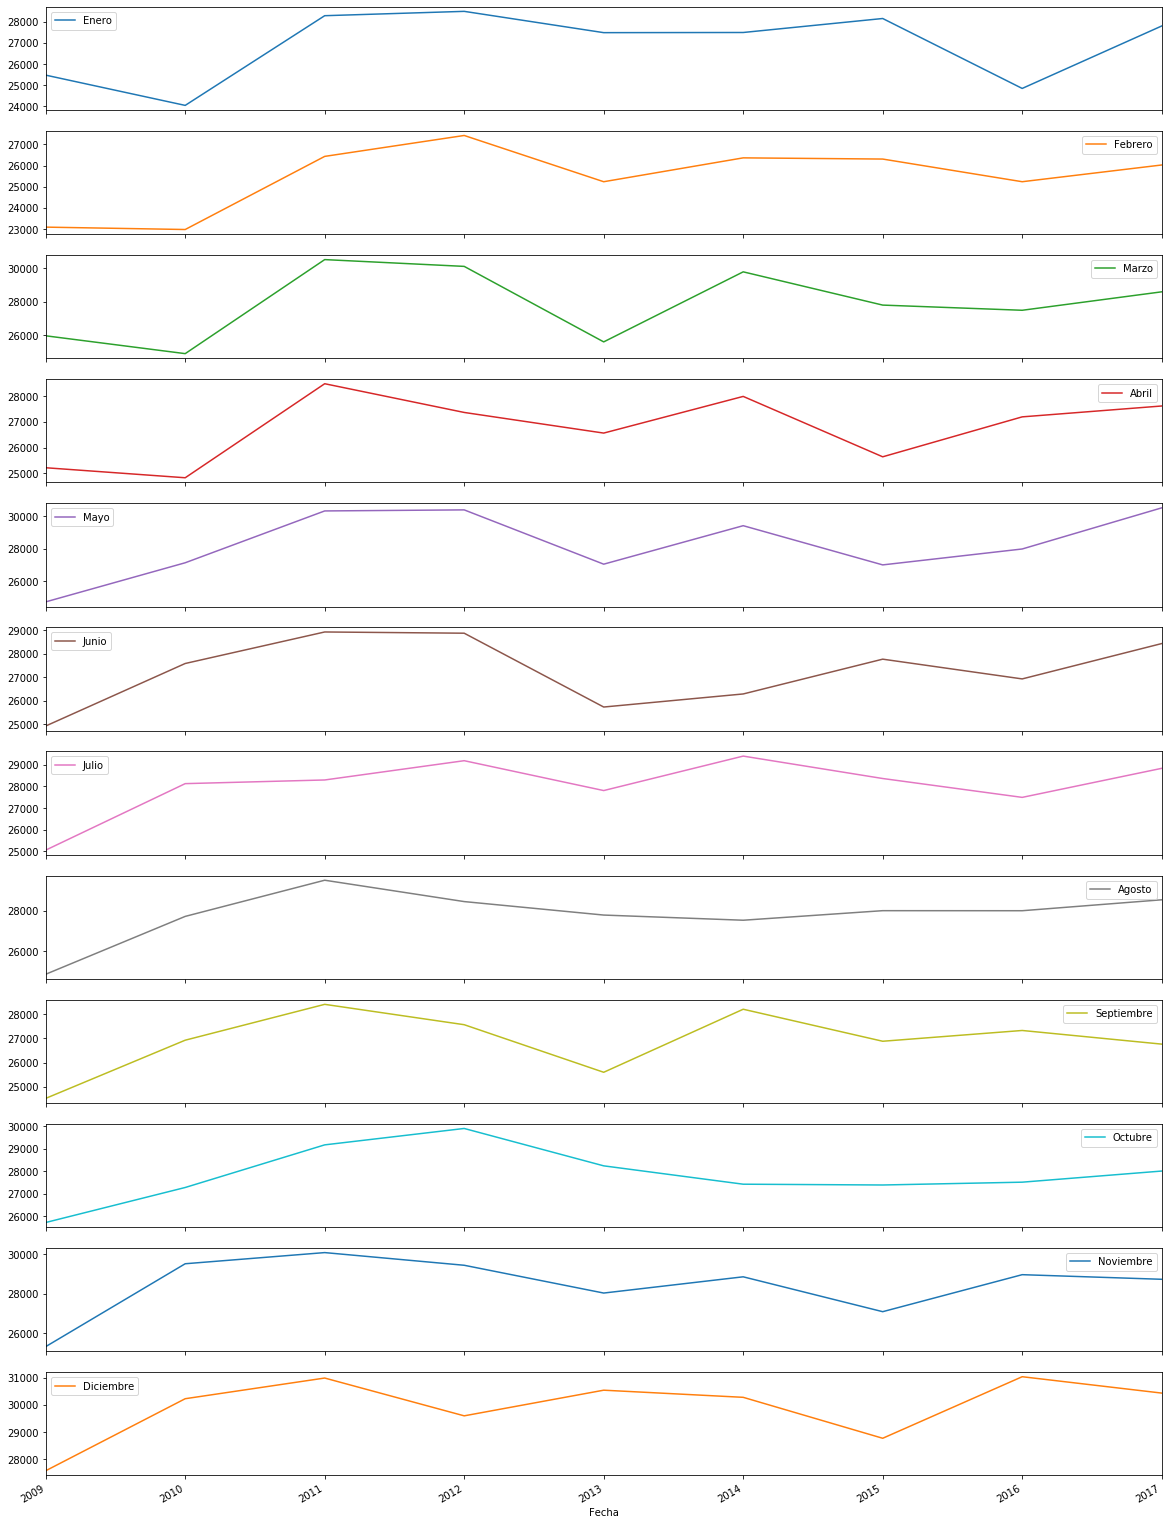

In [26]:
medicionesResiduos.plot(subplots=True, figsize=(20,30));

In [27]:
residuosAnualesSerie = crearSerie(medicionesResiduos, 'Cantidad')

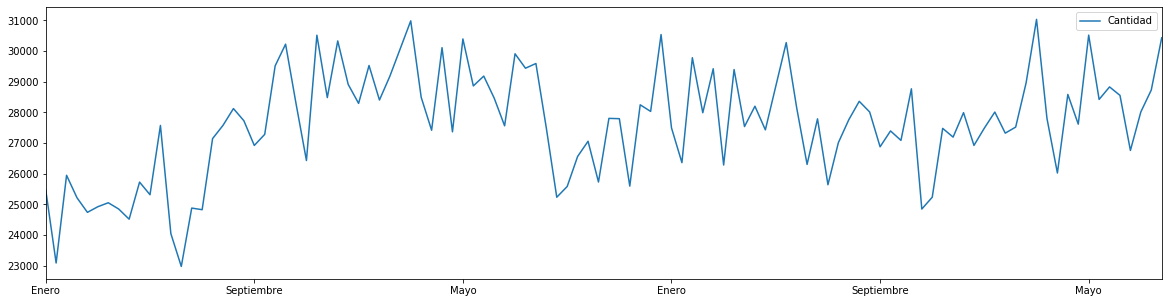

In [28]:
residuosAnualesSerie.plot(figsize=(20,5));

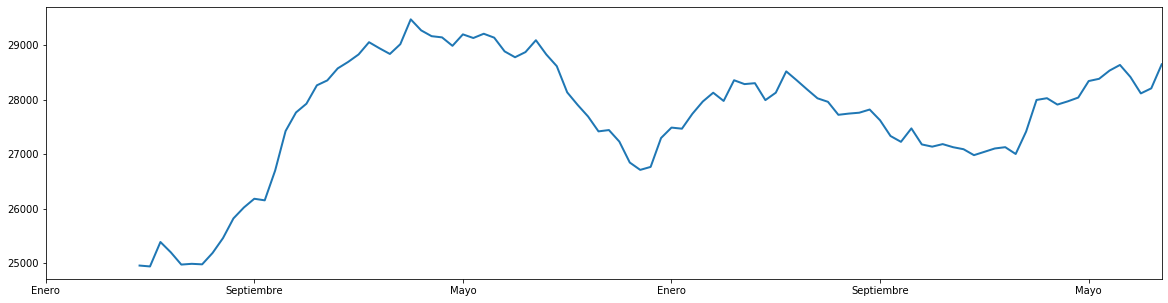

In [29]:
residuosAnualesSerie.Cantidad.rolling(10).mean().plot(figsize=(20,5), linewidth=2, fontsize=10);